In [1]:
import pandas as pd
df=pd.read_csv('./data/vehicle_prod.csv')

In [2]:
df

,Unnamed: 0,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [3]:
df1=df.rename(columns={'Unnamed: 0':'Country'})

In [4]:
df1.set_index('Country', inplace=True)

In [5]:
df1

,2007,2008,2009,2010,2011
Country,,,,,
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [6]:
df1[['2007']]

,2007
Country,
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [7]:
df1.columns.tolist()

['2007', '2008', '2009', '2010', '2011']

In [8]:
df['2007'].tolist

<bound method IndexOpsMixin.tolist of 0     7.71
1    19.02
2    10.47
3    10.87
4     4.04
5     2.01
Name: 2007, dtype: float64>

In [9]:
df1.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [9]:
df1.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


# 상관관계  
변수들 간의 값의 변화의 유사도,
- 음의 상관: 서로 반대 방행으로 변화 증가>감소, 감소>증가
- 양의 상관: 서로 같은 방향으로 변화, 증가>증가, 감소>감소

In [10]:
df2=df1.copy()

In [11]:
# 07부터11년도까지 생산량을 합한 total_production 컬럼을 생성해보자
df2['total_production']=df2.sum(axis=1, numeric_only=True)
df2

,2007,2008,2009,2010,2011,total_production
Country,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35


In [12]:
# 행으로 추가
df2.loc['total']=df2.sum(axis=0, numeric_only=True)

In [13]:
df2

,2007,2008,2009,2010,2011,total_production
Country,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total,54.12,50.77,45.04,55.68,57.25,262.86


In [14]:
# 시리즈 생성
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

# 데이터프레임 생성
store_df = pd.DataFrame({
    '월': month_se,
    '수입': income_se,
    '지출': expenses_se
})


In [17]:
# 순수입 컬럼 추가하기
store_df1=pd.concat([month_se,income_se,expenses_se], axis=1,ignore_index=True)

In [23]:
store_df2=store_df1.rename(columns={0:'월',1:'수입',2:'지출'})
store_df2

,월,수입,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


In [37]:
store_df2['순수입']=store_df['수입']-store_df['지출']
store_df2

,월,수입,지출,순수입
0,1월,9500,5040,4460
1,2월,6200,2350,3850
2,3월,6050,2300,3750
3,4월,7000,4800,2200


# 시각화

<Axes: >

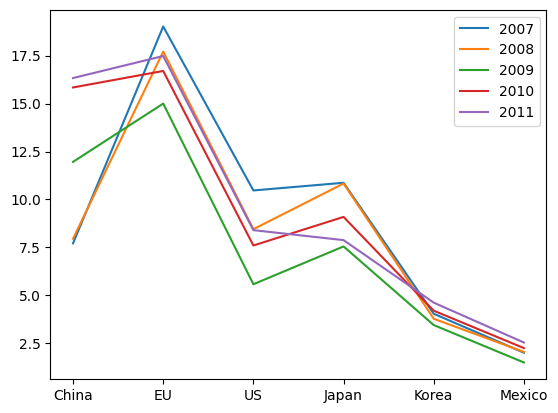

In [ ]:
df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
#CSV 파일의 첫 번째 열(0번째 인덱스 열)을 DataFrame의 인덱스로 사용하라고 지정
df.plot.line()

<Axes: xlabel='Country'>

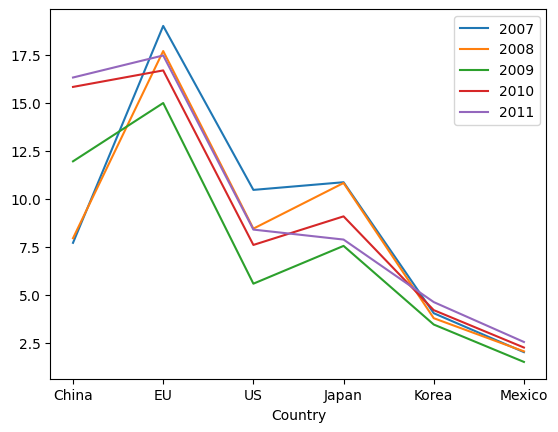

In [39]:
df1.plot.line()

Text(0, 0.5, 'Production')

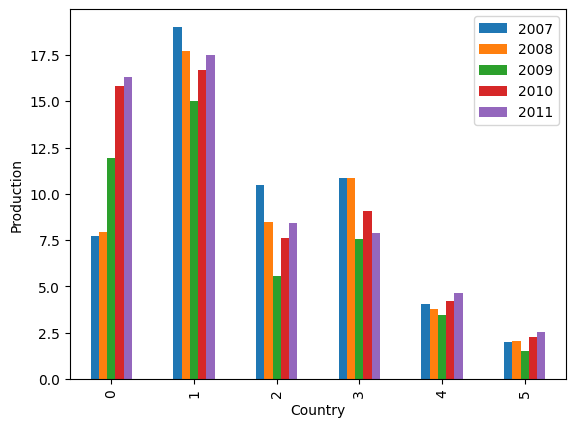

In [28]:
ax=df.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Production')

In [31]:
df_year=df.transpose()


<Axes: >

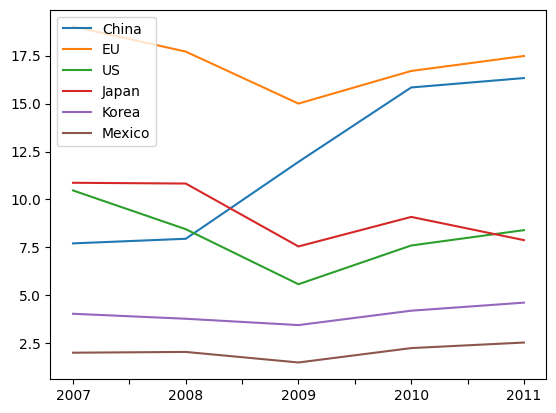

In [41]:
df_year = df.transpose()
df_year.plot.line()

# 결축치 np.nan, pd.NA


In [1]:
import numpy as np
np.nan ==0

False

In [3]:
x =[1,2, np.nan,4]
x

[1, 2, nan, 4]

In [4]:
import pandas as pd
pd.NA
pd.isna(x)

array([False, False,  True, False])

In [47]:
pd.NA ==np.nan

<NA>

In [48]:
pd.isnull(np.nan)

True

In [5]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

df = pd.DataFrame(data)

In [ ]:
# 결측치 갯수 확인
pd.isnull(df)

,name,age,score,city
0,False,False,False,False
1,False,True,False,False
2,False,False,True,True
3,False,False,False,False
4,False,True,False,False


In [52]:
pd.isnull(df).sum()

name     0
age      2
score    1
city     1
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


In [ ]:
# 결측치 제거
df.dropna() # 행전체 제거

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [ ]:
df.dropna(axis=1) # 열전체 제거

,name
0,Alice
1,Bob
2,Charlie
3,David
4,Eva


In [ ]:
df.dropna(subset='score') # 해당컬럼의 na가 있는 행을 삭제

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [59]:
df.dropna(subset=['age'])

,name,age,score,city
0,Alice,25.0,90.0,Seoul
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon


## 채우기

In [60]:
df['age'].fillna(0)

0    25.0
1     0.0
2    30.0
3    22.0
4     0.0
Name: age, dtype: float64

## 수치형 변수의 경우는 대푯값: 평균, 중앙값, 최빈값

In [62]:
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [63]:
df['age'].fillna(df['age'].median())

0    25.0
1    25.0
2    30.0
3    22.0
4    25.0
Name: age, dtype: float64

In [ ]:
df['age'].fillna(df['age'].mode()) # 최빈값
# nan 나오는 이유는 최빈값이 여러개라서

0    25.0
1    25.0
2    30.0
3    22.0
4     NaN
Name: age, dtype: float64

In [6]:
df['age'].fillna(df['age'].mode().iloc[0]) # 최빈값 지정

0    25.0
1    22.0
2    30.0
3    22.0
4    22.0
Name: age, dtype: float64

## 직전값 ffill, 직후값


In [7]:
df['score'].fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14084\3387885858.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
df['score'].bfill() # 직후값으로 처리

0    90.0
1    85.0
2    88.0
3    88.0
4    95.0
Name: score, dtype: float64

In [10]:
df['age']<30

0     True
1    False
2    False
3     True
4    False
Name: age, dtype: bool

In [ ]:
df['age'].mask(df['age']<30,30) # 컬럼의 값에 조건을 주어 대체할 때 사용

0    30.0
1     NaN
2    30.0
3    30.0
4     NaN
Name: age, dtype: float64

In [12]:
tdf=pd.read_csv('./data/titanic.csv')
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
tdf.isnull().sum()
# pd.isna(tdf).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
tdf.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [22]:
tdf['Age'].fillna(tdf['Age'].median(),inplace=True) # 나이같은 이상현 변수는 median쓴다
# 연속형이면 mean도 ok

C:\Users\Admin\AppData\Local\Temp\ipykernel_14084\830931842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tdf['Age'].fillna(tdf['Age'].median(),inplace=True) # 나이같은 이상현 변수는 median쓴다


In [23]:
tdf['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

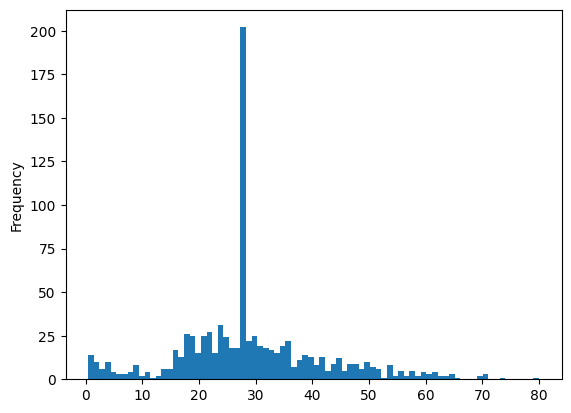

In [29]:
tdf['Age'].plot(kind='hist' ,bins=80) #히스토그램 , bins는 막대기 간격 조정-> 더 세밀하게

In [30]:
# cabin='unknown'
tdf['Cabin'].fillna('Unknown',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14084\3444527083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tdf['Cabin'].fillna('Unknown',inplace=True)


In [31]:
tdf['Cabin'].value_counts()   

Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

In [34]:
# Embarked의 최빈값으로 채우기
tdf['Embarked'].fillna(tdf['Embarked'].mode(), inplace=True)

In [35]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# CARD_SUBWAY_MONTH연습문제

In [62]:
mdf=pd.read_csv('./data/CARD_SUBWAY_MONTH_202102.csv',index_col=False)

In [63]:
mdf.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204


In [ ]:
# 총 몇건인지 코드로 
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16751 entries, 20210201 to 20210228
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    16751 non-null  object 
 1   노선명     16751 non-null  object 
 2   역명      16751 non-null  int64  
 3   승차총승객수  16751 non-null  int64  
 4   하차총승객수  16751 non-null  int64  
 5   등록일자    0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 916.1+ KB


In [64]:
#평균, 표준편차, 사분위수 등 주요 통계 지표를 확인하세요
mdf.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.675100e+04,16751.000000,16751.000000,1.675100e+04
mean,2.021021e+07,8567.344696,8536.474419,2.021023e+07
std,8.083073e+00,9006.651687,9064.054078,2.749315e+01
min,2.021020e+07,1.000000,0.000000,2.021020e+07
25%,2.021021e+07,2652.500000,2594.500000,2.021021e+07
50%,2.021022e+07,5857.000000,5733.000000,2.021022e+07
75%,2.021022e+07,11257.000000,11117.000000,2.021022e+07
max,2.021023e+07,88904.000000,87891.000000,2.021030e+07


In [65]:
#몇 개의 컬럼이 있는지, 각 컬럼에 포함된 데이터들의 타입은 무엇인지 확인해보세요.
mdf.columns.tolist()

['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']

In [66]:
#‘노선명’ 컬럼이 가지고 있는 데이터의 종류를 확인하세요
mdf['노선명'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16751 entries, 0 to 16750
Series name: 노선명
Non-Null Count  Dtype 
--------------  ----- 
16751 non-null  object
dtypes: object(1)
memory usage: 131.0+ KB


In [67]:
# 승차 총 승객수 컬럼을 기준으로 데이터를 정렬하세요
mdf.sort_values(by=['승차총승객수'])

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
4678,20210208,분당선,복정,1,0,20210211
4367,20210208,6호선,연신내,1,0,20210211
13857,20210224,분당선,복정,1,0,20210227
10025,20210217,경의선,김포공항,1,0,20210220
11481,20210220,분당선,복정,1,0,20210223
...,...,...,...,...,...,...
14384,20210225,2호선,강남,84374,82960,20210228
14314,20210224,2호선,강남,84628,82667,20210227
13705,20210223,2호선,강남,84922,83364,20210226
10857,20210219,2호선,강남,86800,80948,20210222


In [68]:
# 2호선만 선택
mdf1=mdf[mdf['사용일자']=='2호선']
mdf1

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자


In [71]:
# 승차 총 승객수가 5천명 이상인 로우의 역명
mdf2=mdf[mdf['승차총승객수']>=50000]
mdf2

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
550,20210201,2호선,구로디지털단지,57932,58583,20210204
552,20210201,2호선,신림,57124,56022,20210204
560,20210201,2호선,강남,77926,76056,20210204
562,20210201,2호선,선릉,53457,46468,20210204
566,20210201,2호선,잠실(송파구청),56357,56358,20210204
...,...,...,...,...,...,...
14994,20210226,2호선,구로디지털단지,61720,61649,20210301
15001,20210226,2호선,홍대입구,54628,58375,20210301
15579,20210227,2호선,잠실(송파구청),56574,53383,20210302
15585,20210227,2호선,강남,57464,57150,20210302


In [87]:
#등록일자 칼럼을 삭제하세요
mdfc=mdf.copy()
mdfc.drop('등록일자',axis=1,inplace=True)
mdfc

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210201,중앙선,용문,1282,1259
1,20210201,중앙선,지평,48,43
2,20210201,중앙선,아신,415,413
3,20210201,중앙선,양수,1463,1466
4,20210201,중앙선,운길산,495,463
...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236
16747,20210228,중앙선,양평,3299,3187
16748,20210228,중앙선,원덕,322,304
16749,20210228,중앙선,용문,1899,1716


In [89]:
#'승차총승객수’와 ‘하차총승객수’ 컬럼의 차이를 계산한 ‘승하차총승객수차이’ 컬럼을 생성하세요.
mdfc['승하차총승객수차이']=mdfc['승차총승객수']-mdfc['하차총승객수']
mdfc

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
0,20210201,중앙선,용문,1282,1259,23
1,20210201,중앙선,지평,48,43,5
2,20210201,중앙선,아신,415,413,2
3,20210201,중앙선,양수,1463,1466,-3
4,20210201,중앙선,운길산,495,463,32
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,-20
16747,20210228,중앙선,양평,3299,3187,112
16748,20210228,중앙선,원덕,322,304,18
16749,20210228,중앙선,용문,1899,1716,183


In [90]:
#‘승하차총승객수차이’의 평균값을 계산하세요
mdfc['승하차총승객수차이'].mean()

np.float64(30.870276401408873)

In [ ]:
mdfc

In [84]:
# 전체 중 10개의 아이템을 샘플링해서 데이터프레임을 생성하세요.
#.sample()
sample_mdfc=mdfc.sample(n=10)
sample_mdfc

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이
12052,20210221,분당선,오리,4726,4129,20210224,597
12,20210201,중앙선,망우,6789,6608,20210204,181
16247,20210228,4호선,미아사거리,15218,14525,20210303,693
8444,20210215,5호선,왕십리(성동구청),4124,4463,20210218,-339
778,20210202,경의선,임진강,7,3,20210205,4
8251,20210214,3호선,경복궁(정부서울청사),7701,8539,20210217,-838
14238,20210224,4호선,삼각지,4545,5024,20210227,-479
206,20210201,경원선,가능,5747,5651,20210204,96
12778,20210222,7호선,용마산(용마폭포공원),5811,5604,20210225,207
4101,20210207,3호선,학여울,655,625,20210210,30


In [85]:
#sample_df의 ‘노선명’ 컬럼의 값이 1호선, 2호선, 3호선 4호선을 영어(line1, line2, line3, line4)로 변경하세요
sample_mdfc['노선명']=sample_mdfc['노선명'].replace({'1호선':'line1','2호선':'line2','3호선':'line3','4호선':'line4'})

In [86]:
sample_mdfc['노선명']

12052      분당선
12         중앙선
16247    line4
8444       5호선
778        경의선
8251     line3
14238    line4
206        경원선
12778      7호선
4101     line3
Name: 노선명, dtype: object

In [92]:
dfm=mdfc.set_index('사용일자')
dfm

,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
사용일자,,,,,
20210201,중앙선,용문,1282,1259,23
20210201,중앙선,지평,48,43,5
20210201,중앙선,아신,415,413,2
20210201,중앙선,양수,1463,1466,-3
20210201,중앙선,운길산,495,463,32
...,...,...,...,...,...
20210228,중앙선,오빈,216,236,-20
20210228,중앙선,양평,3299,3187,112
20210228,중앙선,원덕,322,304,18


In [93]:
def getDate(data):
    dt=str(data)
    yy=dt[0:4]
    mm=dt[4:6]
    dd=dt[6:8]
    return yy+'-'+mm+'-'+dd

d=20210303
getDate(d)
    

'2021-03-03'

In [96]:
mdfc['사용일자1']=mdfc['사용일자'].apply(getDate)

In [97]:
mdfc

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이,사용일자1
0,20210201,중앙선,용문,1282,1259,23,2021-02-01
1,20210201,중앙선,지평,48,43,5,2021-02-01
2,20210201,중앙선,아신,415,413,2,2021-02-01
3,20210201,중앙선,양수,1463,1466,-3,2021-02-01
4,20210201,중앙선,운길산,495,463,32,2021-02-01
...,...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,-20,2021-02-28
16747,20210228,중앙선,양평,3299,3187,112,2021-02-28
16748,20210228,중앙선,원덕,322,304,18,2021-02-28
16749,20210228,중앙선,용문,1899,1716,183,2021-02-28


In [98]:
mdfc['사용일자1']=pd.to_datetime(mdf['사용일자'],format='%Y%m%d')
mdfc

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이,사용일자1
0,20210201,중앙선,용문,1282,1259,23,2021-02-01
1,20210201,중앙선,지평,48,43,5,2021-02-01
2,20210201,중앙선,아신,415,413,2,2021-02-01
3,20210201,중앙선,양수,1463,1466,-3,2021-02-01
4,20210201,중앙선,운길산,495,463,32,2021-02-01
...,...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,-20,2021-02-28
16747,20210228,중앙선,양평,3299,3187,112,2021-02-28
16748,20210228,중앙선,원덕,322,304,18,2021-02-28
16749,20210228,중앙선,용문,1899,1716,183,2021-02-28


In [103]:
dummies = pd.get_dummies(sample_mdfc['노선명'], prefix='노선')
dummies
dummies.astype(int)

,노선_5호선,노선_7호선,노선_line3,노선_line4,노선_경원선,노선_경의선,노선_분당선,노선_중앙선
12052,0,0,0,0,0,0,1,0
12,0,0,0,0,0,0,0,1
16247,0,0,0,1,0,0,0,0
8444,1,0,0,0,0,0,0,0
778,0,0,0,0,0,1,0,0
8251,0,0,1,0,0,0,0,0
14238,0,0,0,1,0,0,0,0
206,0,0,0,0,1,0,0,0
12778,0,1,0,0,0,0,0,0
4101,0,0,1,0,0,0,0,0


In [ ]:
#노선명으로 그룹핑해서 승차,하차 총승객수의 평균을 계산
mdf.groupby('노선명').mean(numeric_only=True)
# 컬럼 지정해도 되고 numeric 써도 됌

,사용일자,승차총승객수,하차총승객수,등록일자
노선명,,,,
1호선,2.021021e+07,16711.396429,16224.032143,2.021023e+07
2호선,2.021021e+07,20258.510000,20406.605714,2.021023e+07
3호선,2.021021e+07,11563.884739,11542.535752,2.021023e+07
4호선,2.021021e+07,13839.026099,13953.564560,2.021023e+07
5호선,2.021021e+07,8774.492588,8727.040431,2.021023e+07
6호선,2.021021e+07,6499.918173,6405.854424,2.021023e+07
7호선,2.021021e+07,10210.968487,10060.233193,2.021023e+07
8호선,2.021021e+07,8356.453782,8425.422269,2.021023e+07
9호선,2.021021e+07,8110.387143,8246.852857,2.021023e+07
